<a href="https://colab.research.google.com/github/fiaazwa/UAS_Kecerdasanbuatan/blob/main/chustomer_churn_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('/content/drive/MyDrive/kecerdasan_buatan/Dataset/Bank_Customer_Churn_Prediction.csv')

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


---
* shape of data
---

In [6]:
df.shape

(10000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


---
# Checking Missing value
---

In [8]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

---
* No missing values
---

In [9]:
df.drop(columns = 'customer_id', inplace = True)

In [10]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.describe(include= 'O')

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [13]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

<ipython-input-14-8418fdf6833a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette='viridis')  # You can change 'viridis' to any palette you like


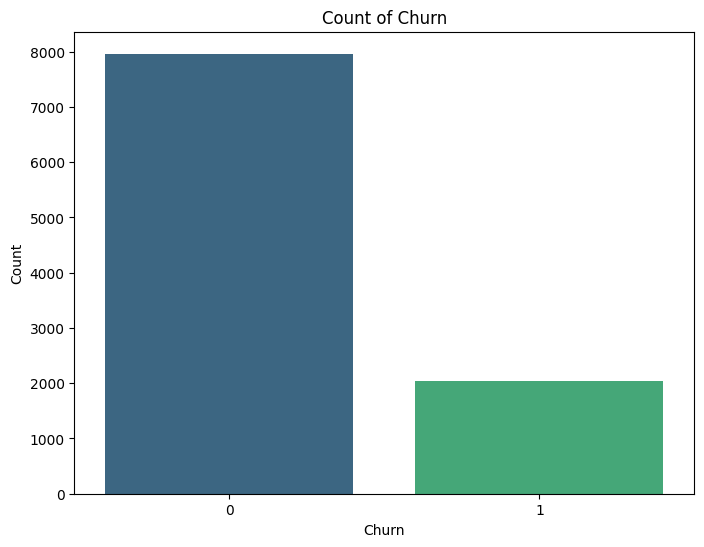

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='churn', palette='viridis')  # You can change 'viridis' to any palette you like
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count of Churn')
plt.show()

---
* We noticed it is imbalanced dataset
---

In [15]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [16]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<ipython-input-17-8e1c663b4d8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='country', palette='viridis')  # You can change 'viridis' to any palette you like


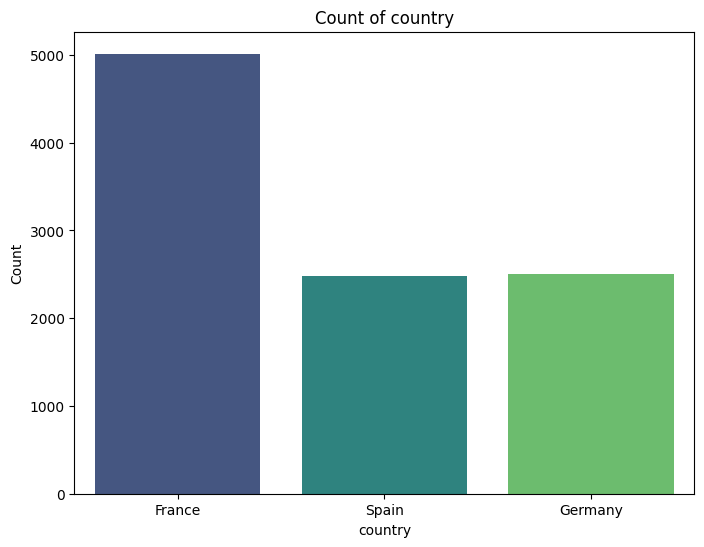

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='country', palette='viridis')  # You can change 'viridis' to any palette you like
plt.xlabel('country')
plt.ylabel('Count')
plt.title('Count of country')
plt.show()

In [18]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

<ipython-input-19-28111f2adc8e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='viridis')  # You can change 'viridis' to any palette you like


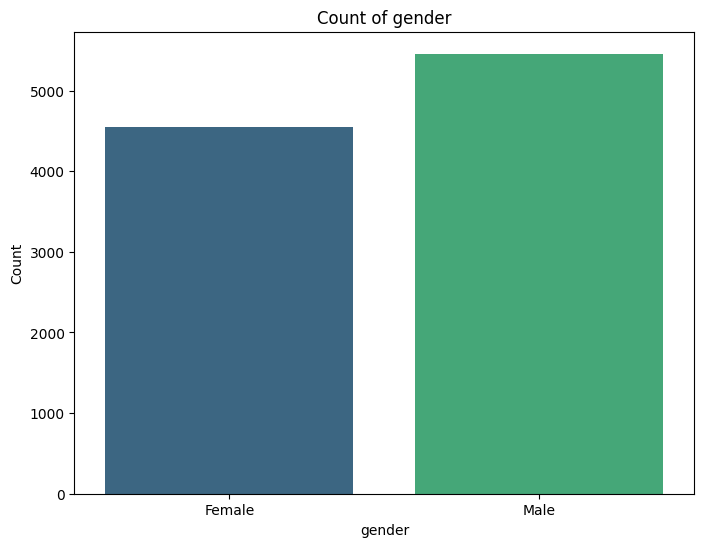

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', palette='viridis')  # You can change 'viridis' to any palette you like
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Count of gender')
plt.show()

---
* inthis dataset Males are more than Female
---

In [20]:

# Assuming df is your DataFrame and you want to convert 'country' and 'gender' columns to numeric
df_encoded = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

# Convert any boolean columns to integer (0 and 1)
df_encoded = df_encoded.astype(int)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   credit_score  age  tenure  balance  products_number  credit_card  \
0           619   42       2        0                1            1   
1           608   41       1    83807                1            0   
2           502   42       8   159660                3            1   
3           699   39       1        0                2            0   
4           850   43       2   125510                1            1   

   active_member  estimated_salary  churn  country_Germany  country_Spain  \
0              1            101348      1                0              0   
1              1            112542      0                0              1   
2              0            113931      1                0              0   
3              0             93826      0                0              0   
4              1             79084      0                0              1   

   gender_Male  
0            0  
1            0  
2            0  
3            0  
4            0  


In [21]:
df_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [22]:
x  =df_encoded.drop(columns=['churn'])
y =df_encoded['churn']

In [23]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Optionally, transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)


In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(x_train_scaled, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5775 - accuracy: 0.7314 - val_loss: 0.4677 - val_accuracy: 0.8019
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4630 - accuracy: 0.7953 - val_loss: 0.4294 - val_accuracy: 0.8087
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4378 - accuracy: 0.8080 - val_loss: 0.4162 - val_accuracy: 0.8238
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4229 - accuracy: 0.8203 - val_loss: 0.4071 - val_accuracy: 0.8338
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8292 - val_loss: 0.3998 - val_accuracy: 0.8381
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8369 - val_loss: 0.3908 - val_accuracy: 0.8388
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8425 - val_loss: 0.3811 - val_accuracy: 0.8394

---
* Predict model
---

In [30]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [31]:
y_pred = np.where(y_log>0.5,1,0)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8605